# Анализ иcторических данных о продажах игр


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Данные за 2016 год могут быть неполными. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.пиыа

#### Шаг 1. Откройте файл с данными и изучите общую информацию

Описание данных  
**Name** — название игры  
**Platform** — платформа  
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** — продажи в Европе (миллионы проданных копий)  
**JP_sales** — продажи в Японии (миллионы проданных копий)  
**Other_sales** — продажи в других странах (миллионы проданных копий)  
**Critic_Score** — оценка критиков (максимум 100)  
**User_Score** — оценка пользователей (максимум 10)  
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В половине столбцов присутствуют пропуски. Среди данных о количестве продаж имеется более 25% нулей. Это связано с тем, что данные исчисляются в милионах копий. Игры представлены с 1980 по 2016 годами выпуска.

#### Шаг 2. Подготовьте данные

*-Замените названия столбцов (приведите к нижнему регистру);  
-Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
-Обработайте пропуски при необходимости:  
-Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
-Опишите причины, которые могли привести к пропускам;  
-Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;  
-Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.*

Для начала, переименуем все столбцы

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

Явных дубликатов нет. Посмотрим на дубликаты в связке наименование-платформа, возможно там есть повторяющиеся строки. По идее, таких строк не должно быть.

In [8]:
df.loc[:, ['name', 'platform']].duplicated().sum()

5

Есть такие неявные дубликаты, где наименование игры и платформы одинаковые. Посмотрим на них подробнее.

In [9]:
i = df[df.loc[:, ["name", "platform"]].duplicated()]['name']
j = df[df.loc[:, ["name", "platform"]].duplicated()]['platform']
df.query('name in @i and platform in @j').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.00,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+


Для игры Madden NFL 13 есть дубликат, одна строка менее информативная, чем вторая. Менее информативную можно снести. Для игры Need for Speed: Most Wanted дубликатов нет, так как игра выходила и в 2005 и в 2012 году. Игра Sonic the Hedgehog 2006 года тоже имеет дубль. Всего было продано к 2014 году около 2-х млн копий игры. То есть к 2016 вполне могло быть 2,2 млн. удалим строку, где у игры есть nan в колонке год. И есть последняя игра 1993 года, название которой мы не знаем, ее тоже можно вообще удалить, так как нет информации ни о наименовании ни о жанре.

In [10]:
df = df[~df['name'].isna()]
df = df.drop(index=[16230, 4127])
df.reset_index(drop=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
df.isna().sum()

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Есть 268 пропусков в колонке year_of_release.

In [12]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В целом, таких данных менее 2%. Удалять их нет смысла, так как они имеют и другую информацию, просто в некоторых группировках и расчетах они не будут использоваться. Оставим как есть.

Посмотрим на данные с пропусками в рейтинге и оценках и попробуем найти взаимосвязь.

Думаю, данные надо рассматривать по периодам. Посмотрим на распределение игр по годам для всех игр и для игр, где нет пропусков (таки образом мы сможем увидеть в какие года игры вообще не имеют рейтинги и оценки и увидеть тенденцию).

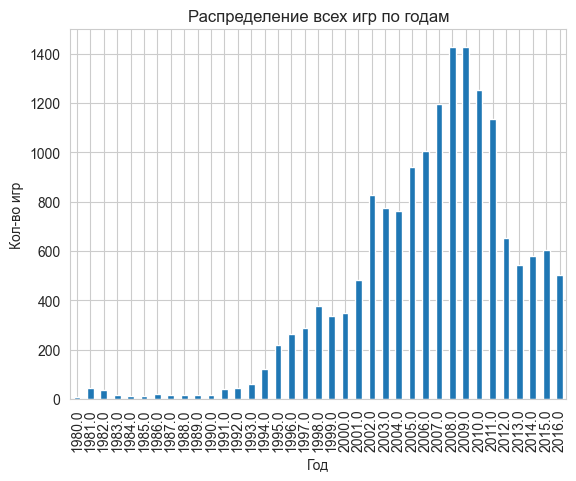

In [13]:
df.groupby('year_of_release')['name'].count().plot(
    kind='bar',
    title='Распределение всех игр по годам',
    xlabel='Год',
    ylabel='Кол-во игр'
);

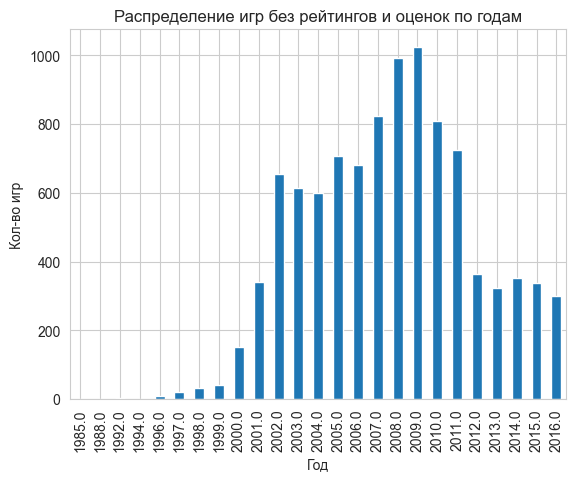

In [14]:
(df.loc[~(df['critic_score'].isna()) | ~(df['user_score'].isna()) | ~(df['rating'].isna())]
 .groupby('year_of_release')['name'].count()
 .plot(
    kind='bar',
    title='Распределение игр без рейтингов и оценок по годам',
    xlabel='Год',
    ylabel='Кол-во игр'
));

In [15]:
a = df.loc[((df['critic_score'].isna())
            & (df['user_score'].isna())
            & (df['rating'].isna()))
            & (df['year_of_release'] < 2000)]['year_of_release'].count()
print(f"Кол-во игр до 2000 года всего: {df[df['year_of_release'] < 2000]['year_of_release'].count()}")
print(f"Кол-во игр до 2000 года без рейтинга и оценок: {a}")

Кол-во игр до 2000 года всего: 1974
Кол-во игр до 2000 года без рейтинга и оценок: 1865


In [16]:
a = df.loc[((df['critic_score'].isna())
            & (df['user_score'].isna())
            & (df['rating'].isna()))
            & (df['year_of_release'] < 1996)]['year_of_release'].count()
print(f"Кол-во игр до 1996 года всего: {df[df['year_of_release'] < 1996]['year_of_release'].count()}")
print(f"Кол-во игр до 1996 года без рейтинга и оценок: {a}")

Кол-во игр до 1996 года всего: 705
Кол-во игр до 1996 года без рейтинга и оценок: 700


Как видим, игры, выпущенные до 1996 почти все не имеют информации о рейтинге и оценках. А с 1996 по 2000 из всех 1974 игр, только около 100 имеет рейтинг и оценку. Посмотрим на распределение платформ среди всех игр без рейтинга и без оценок

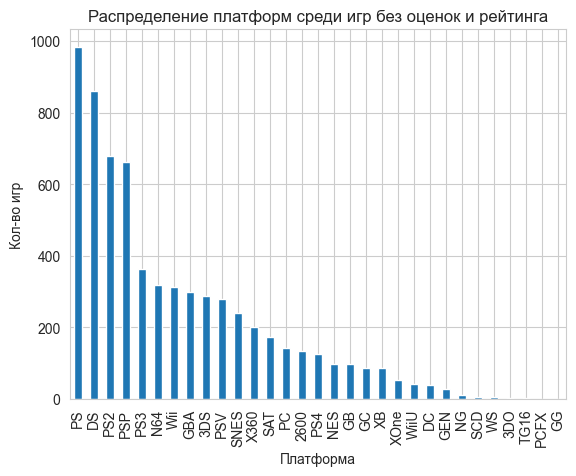

In [17]:
df.loc[(df['critic_score'].isna())
       & (df['user_score'].isna())
       & (df['rating'].isna())].groupby('platform')['name'].count().sort_values(ascending=False).plot(
    kind='bar',
    title='Распределение платформ среди игр без оценок и рейтинга',
    xlabel='Платформа',
    ylabel='Кол-во игр'
);

In [18]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Игры в нашей таблице встречаются с 1980 года. В те времена игровой индустрия не была сильно развита, начинали появляться только первые игры. С началом развития интернета, начался рост популярности игровой индустрии.

До 1996 года отсутствовала централизованной системы оценки: не было широко распространенных и универсальных систем оценки игр, информация об играх скорее была на бумажных носителях, и информация об оценках могла быть недоступной или нефиксированной, а так же не было стандартов оценивания игр, например разные платформы по-разному и по разным шкалам оценивали игры.

Организация ESRB была основана только в 1994. И к началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей. Возможно, они больше затрагивали новые игры, чем старые, выпущенные до 1994 года.

Возможно, доступные открытые источники данных не содержат полную информацию о рейтингах и оценках для игр до 2000 года.

Все эти факторы могли повлиять на то, что у нас крайне мало информации об оценках и рейтингах игр до 2000 года.

Рассмотрим игры, выпущенные после 2000 года.

In [19]:
a = df.loc[((df['critic_score'].isna())
            & (df['user_score'].isna())
            & (df['rating'].isna()))
            & (df['year_of_release'] > 1999)]['year_of_release'].count()
print(f"Кол-во игр с 2000 года всего: {df[df['year_of_release'] > 1999]['year_of_release'].count()}")
print(f"Кол-во игр с 2000 года без рейтинга и оценок: {a}")

Кол-во игр с 2000 года всего: 14469
Кол-во игр с 2000 года без рейтинга и оценок: 4669


Здесь все немного иначе, среди игр, выпущенных с 2000 года 2/3 игр имеет оценки и рейтинги.

С 2000 года начался скачок частоты выхода новых игр, начали развиваться системы оценок игр, появляться специализированные ресурсы, где можно найти оценки игр например Metacritic, GameRankings, Steam и др. Появились возрастные рейтинги игр. Все это позволяет нам найти в открытых источниках данные об этих играх.

Однако, треть игр, выпущенных с 2000 года не имеют ни оценок, ни рейтинга.
Вполне возможно, что к этому привела совокупность нескольких факторов. Например:

- Из-за недостатка обратной связи: некоторые игры могли не получить достаточного количества оценок от критиков или пользователей из-за низкой популярности или ограниченного внимания. К сожалению, не все игры имеют достаточное кол0во последователей

- Затухающий интерес: Временные пропуски в информации о рейтингах и оценках могут быть связаны с постепенным снижением интереса к игре или платформе с течением времени. Например, игровые приставки PlayStation имеют несколько моделей, которые выпускались со временем и со временем же старые модели потихоньку переставали поддерживаться, соответственно к новым играм на старых моделях интерес мог снижаться.

- Изменение трендов в оценивании: со временем критерии оценки и предпочтения игроков могут меняться, что может отразиться на количестве и качестве предоставленных оценок.

- Отсутствие ресурсов на сбор информации (времени, денег).

- Ну и так же всегда есть вероятность технических проблем при сборе данных.

Рассмотрим рейтинг среди известных данных

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Организация ESRB имеет следующие рейтинги:

EC (Early childhood) 3+  
E (Everyone) Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.  
E10+ (Everyone 10 and older) 10+  
T (Teen) 13+  
M (Mature) 17+  
AO (Adults Only) 18+  
RP (Rating Pending) Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.  
K-A (Kids to Adults) - первоначальное наименование рейтинга E  

В нашей таблице встречается рейтинг K-A, заменим эти строки на E  

In [21]:
df.loc[df['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


In [22]:
df['rating'].replace({'K-A': 'E'}, inplace=True)
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски в столбце rating на значение 'no rating'.

In [23]:
df['rating'].fillna('no rating', inplace=True)
df['rating'].unique()

array(['E', 'no rating', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Рассмотрим оценки среди известных данных

In [24]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди оценок пользователей есть значение "tbd". Значение "tbd" в столбце оценки пользователей обычно означает "to be determined" или "to be decided", что означает, что оценка ещё не определена или неизвестна на момент сбора данных. Это может быть связано с тем, что, либо оценка пользователей ещё не была предоставлена, либо информация о ней не была доступна в источнике данных. Заменим эти данные на NaN. И сразу заменить тип данных в этом столце на float.

In [25]:
df.loc[df["user_score"] == 'tbd', "user_score"] = np.nan
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Добавим столбец в таблицу с суммарными продажами для каждой игры во всех регионах.

In [26]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


In [27]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16443.000000,16711.000000,16711.000000,16711.000000,16711.000000,8135.000000,7588.000000,16711.000000
mean,2006.485921,0.263334,0.145033,0.077634,0.047348,68.969146,7.125659,0.533349
std,5.875546,0.813609,0.503381,0.308888,0.186752,13.936036,1.499686,1.548370
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           16711 non-null  object 
 11  total_sales      16711 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


#### Шаг 3. Проведите исследовательский анализ данных

-Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
-Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
-Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.  
-Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
-Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  
-Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
-Соотнесите выводы с продажами игр на других платформах.  
-Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

*Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*

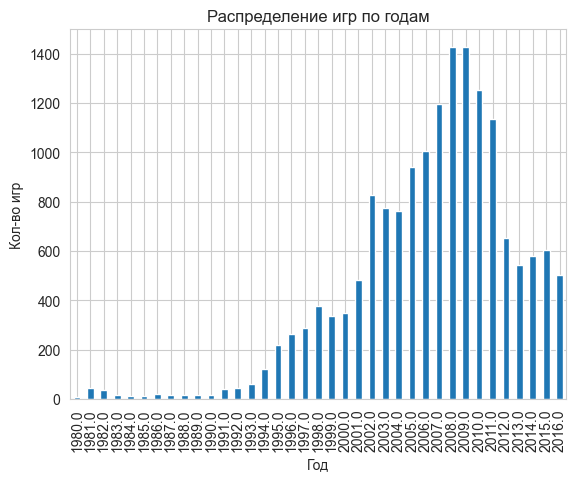

In [29]:
df.groupby('year_of_release')['name'].count().plot(
    kind='bar',
    title='Распределение игр по годам',
    xlabel='Год',
    ylabel='Кол-во игр'
);

В разные годы игры выпускались неравномерно. До 1994 года выходило до 50-ти игр в год. С 1994 по 2001 начался рост выпуска игр и дошло до 400 игр в год, с 2002 по 2006 кол-во игр доходило до 1000 в год, с 2007 по 2011 - был пик, доходило до 1400 игр в год в пик 2008-09 годах, далее с 2012 года по 2016 произошел спад (из-за распространения мобильных устройств и появлением игр на них) и выходило примерно 600 новых игр в год. Вероятнее всего, нам как минимум не нужны данные до 2002 года.

*Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?*

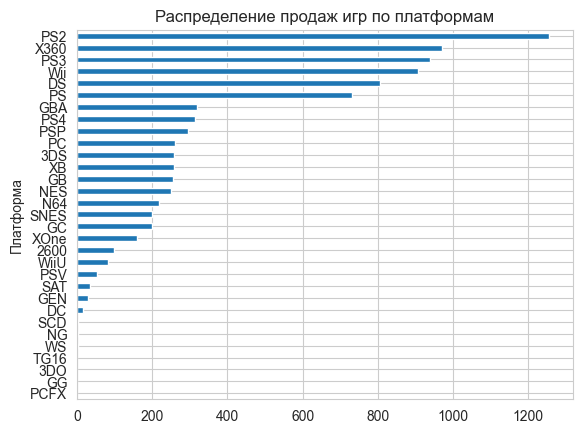

In [30]:
best_platforms = df.groupby('platform')['total_sales'].sum().sort_values()
best_platforms.plot(
    kind='barh',
    title='Распределение продаж игр по платформам',
    xlabel='Платформа',
    ylabel='Кол-во игр'
);

Есть 6 платформ с наибольшими суммарными продажами.

In [31]:
best_platforms.sort_values(ascending=False).head(6).reset_index().platform.unique()

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

Нашлась ошибка в данных, игра Strongest Tokyo University Shogi DS не могла быть выпушена в 1985 году дл DS, так как сама платформа ds появилась в 2004 году. Инетрнет говорит, что  игра была выпущена в 2005 году. Заменим это и после построим графики.

In [32]:
df.loc[(df['platform'] == "DS") & (df['year_of_release'] == 1985), 'year_of_release'] = 2005
df.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


*Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.*

Создадим функцию для создания барпота.

In [33]:
def get_barplot(ser, name=''):
    fig, ax = plt.subplots(1, figsize=(5, 3))
    ax.bar(ser.index, ser.values,
           alpha=0.8,
           color='red')

    ax.set_ylabel('Кол-во продаж, млн')
    ax.set_xlabel('Год выпуска')
    ax.grid(True)
    plt.suptitle(f'Распределение продаж игр на платформе {name} по годам')
    plt.xticks(ser.index, rotation=30)

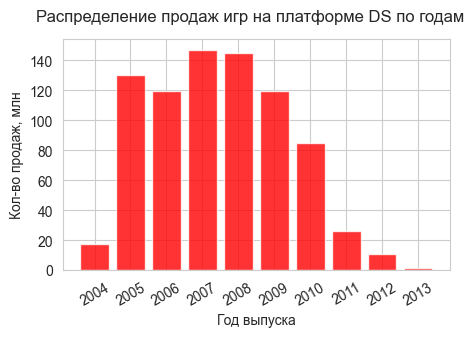

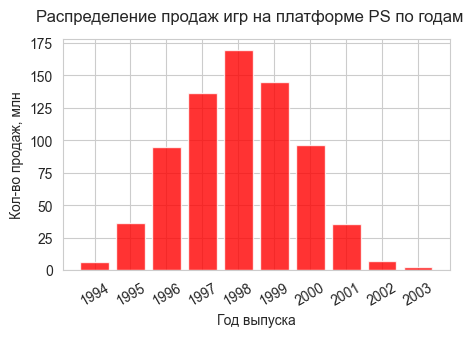

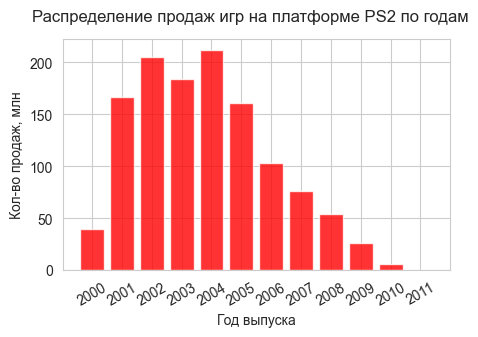

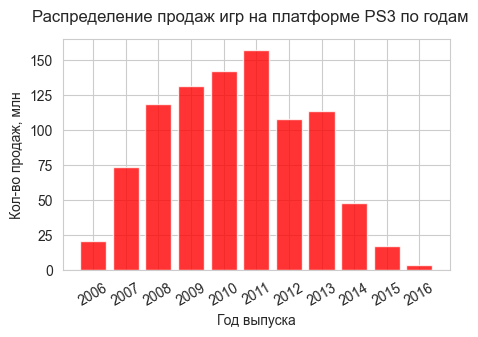

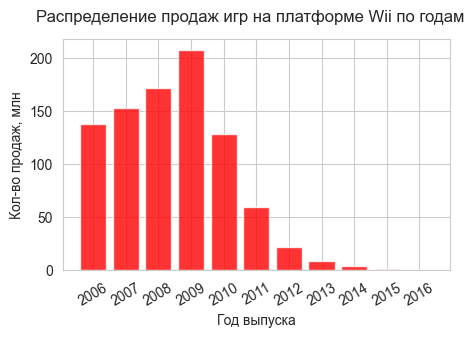

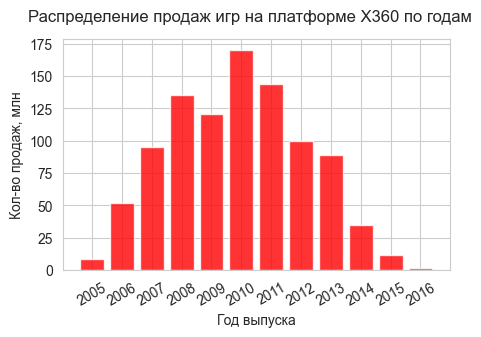

In [34]:
for elem in sorted(best_platforms.sort_values(ascending=False).head(6).reset_index().platform.unique()):
    get_barplot(df[df['platform'] == elem].groupby('year_of_release')['total_sales'].sum(), elem)

Как видим на графике, около 10 лет - время жизни 1 платформы.

Для нахождения актуального периода, необходимо понять, за какой период мы сможем оценить рост/спад платформ.
Данные за 10 лет брать нет смысла, для построения и понимания роста/спада хватит 2-3 лет для анализа. Стоит так же учесть, что данные за 2016 год могут быть не полными, но для анализа подойдут, так как это последние актуальные данные, хоть и не полные. 

Возьмем актуальный период с 2014 по 2016 год - получится 2.5 года

In [35]:
actual_df = df[(df['year_of_release'] > 2013) & (df['year_of_release'] < 2017)].reset_index(drop=True)
actual_df['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

*Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.*

По предыдущим графикам, мы уже знаем, что Wii, PS3, X360 - точно убывают.

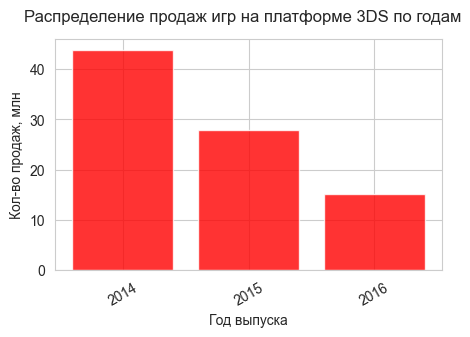

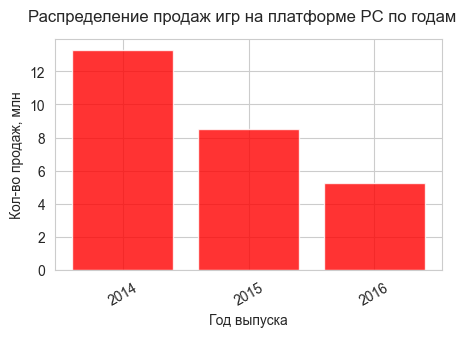

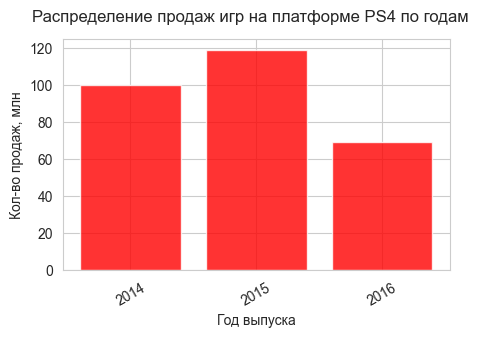

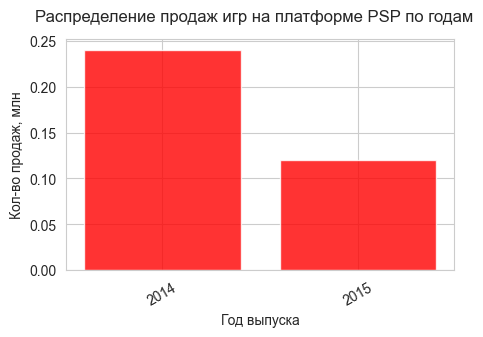

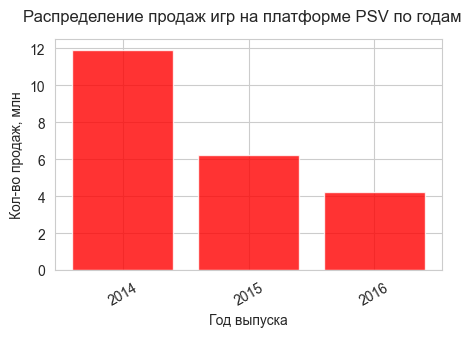

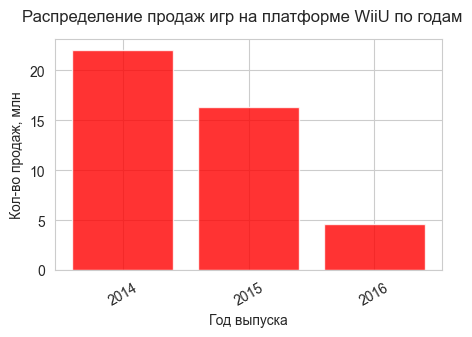

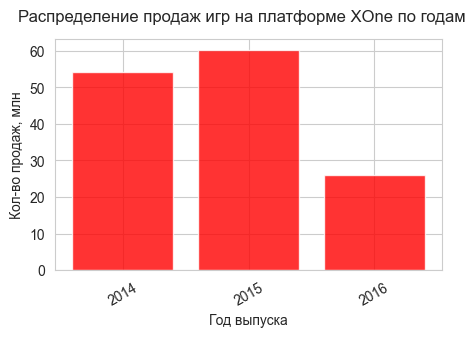

In [36]:
for elem in sorted(actual_df['platform'].unique()):
    if elem not in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
        get_barplot(actual_df[actual_df['platform'] == elem].groupby('year_of_release')['total_sales'].sum(), elem)

За актуальный период наблюдается рост популярности таких платформ, как XOne, PS4.  
Так же среди платформ, недавно перешедших пик популярности есть несколько потенциально интересных:
- платформа 3DS - ее популярность идет на спад, но объем продаж за актуальный период все еще внушительный, стоит присмотреться к ней.
- платформа WiiU, за актуальный период имела продаж до 20 млн копий. Сейчас спад этой платформы, но это не значит, что продаж не будет вовсе, их просто будет меньше.
- РС так же стоит учитывать, его популярность отличается в разные периоды, но 30-тилетняя история персональных компьютеров показывает, что игры для PC можно включить в рекомендацию.

*Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.*

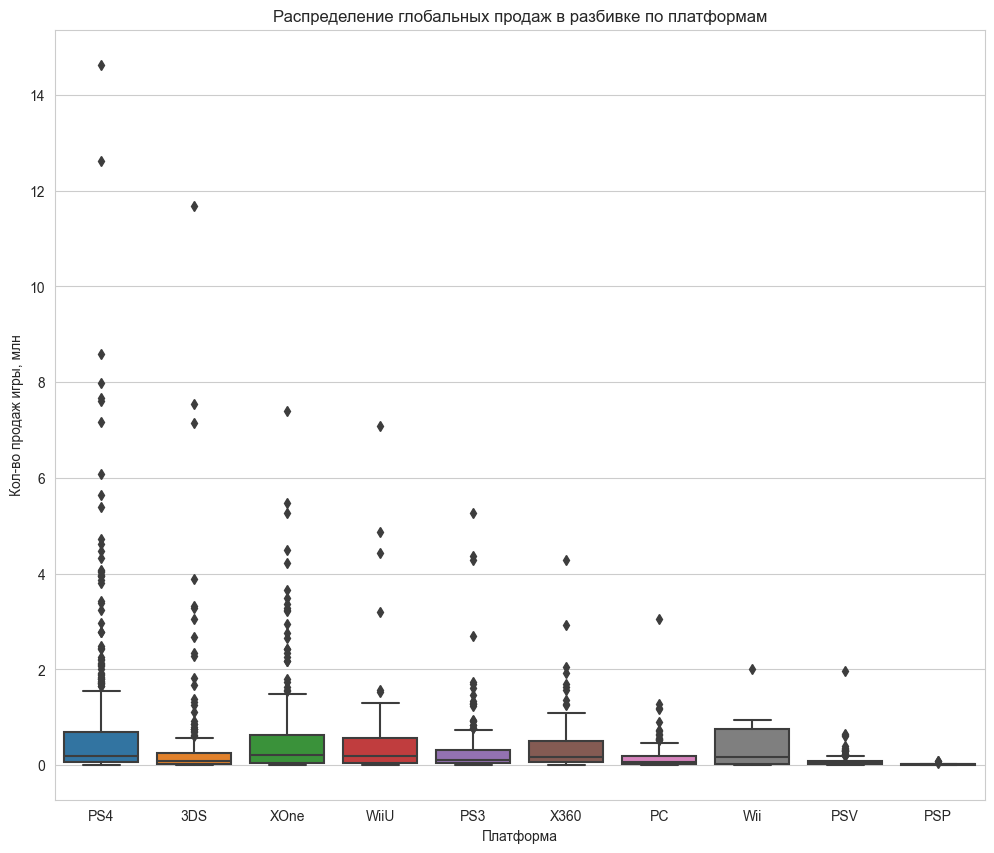

In [37]:
fig = plt.figure(figsize=(12, 10))
sns.boxplot(x=actual_df['platform'], y=actual_df['total_sales']);
plt.title('Распределение глобальных продаж в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж игры, млн')
plt.show()

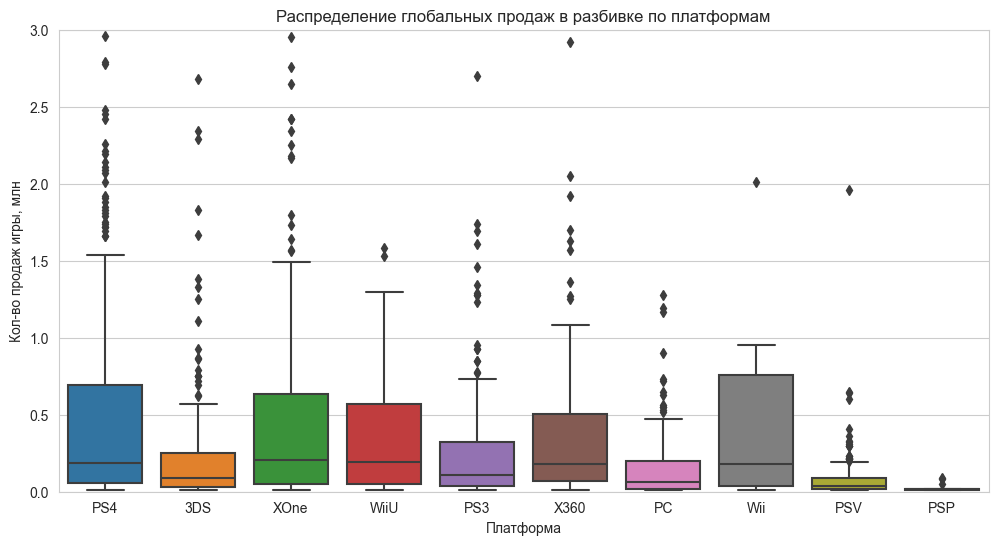

In [38]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot(x=actual_df['platform'], y=actual_df['total_sales']);
plt.ylim(0, 3)
plt.title('Распределение глобальных продаж в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж игры, млн')
plt.show()

In [39]:
actual_df['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

Как мы подметили ранее, за данный период самыми востребованными являются платформы PS4 и XOne.

В среднем, за период с 2014 по 2016 года почти 75% игр продаются в кол-ве до 400 тыс штук. 25% игр вообще продаются в кол-ве меньше 30 тыс штук в год. Но так же встречаются игры, которые продаются свыше 1млн копий, но их гораздо меньше.

*Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.*

In [40]:
xone = actual_df[actual_df['platform'] == 'XOne']
ps4 = actual_df[actual_df['platform'] == 'PS4']
display(xone.head(5), ps4.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no rating,7.39
14,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
16,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
21,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
28,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98
5,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


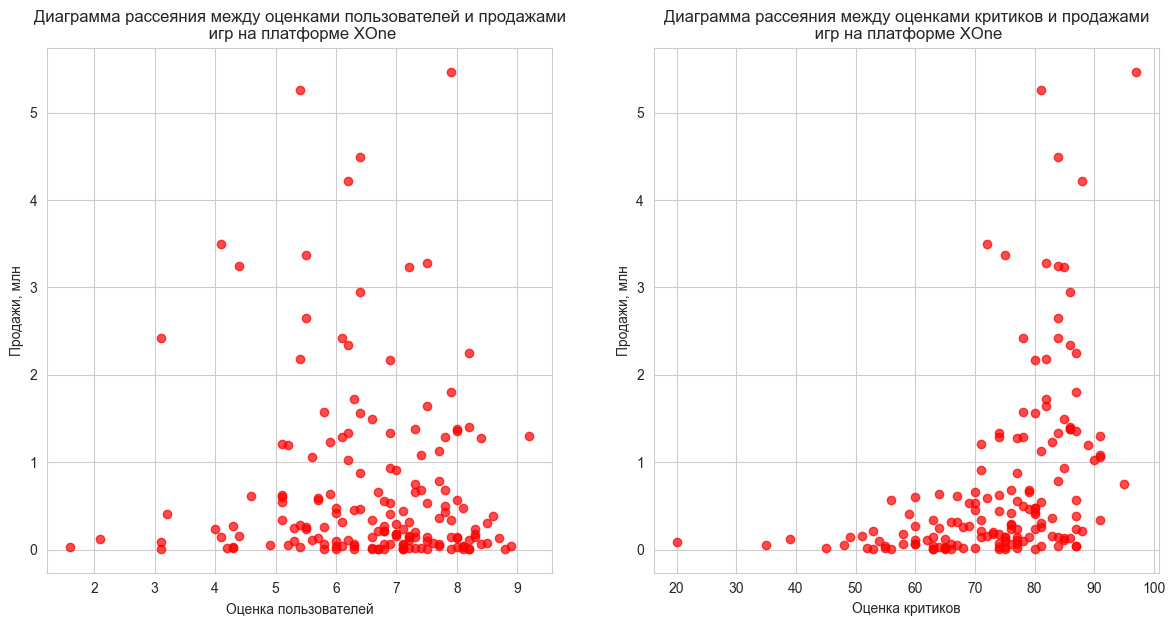

In [41]:
fig = plt.figure(figsize=(30, 15))
ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax1.grid(True)
ax2.grid(True)
ax1.scatter(x=xone['user_score'], y=xone['total_sales'], alpha=0.7, color='red')
ax2.scatter(x=xone['critic_score'], y=xone['total_sales'], alpha=0.7, color='red')
ax1.set_ylabel('Продажи, млн')
ax1.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Продажи, млн')
ax2.set_xlabel('Оценка критиков')
ax1.set_title('Диаграмма рассеяния между оценками пользователей и продажами\n игр на платформе XOne')
ax2.set_title('Диаграмма рассеяния между оценками критиков и продажами\n игр на платформе XOne');

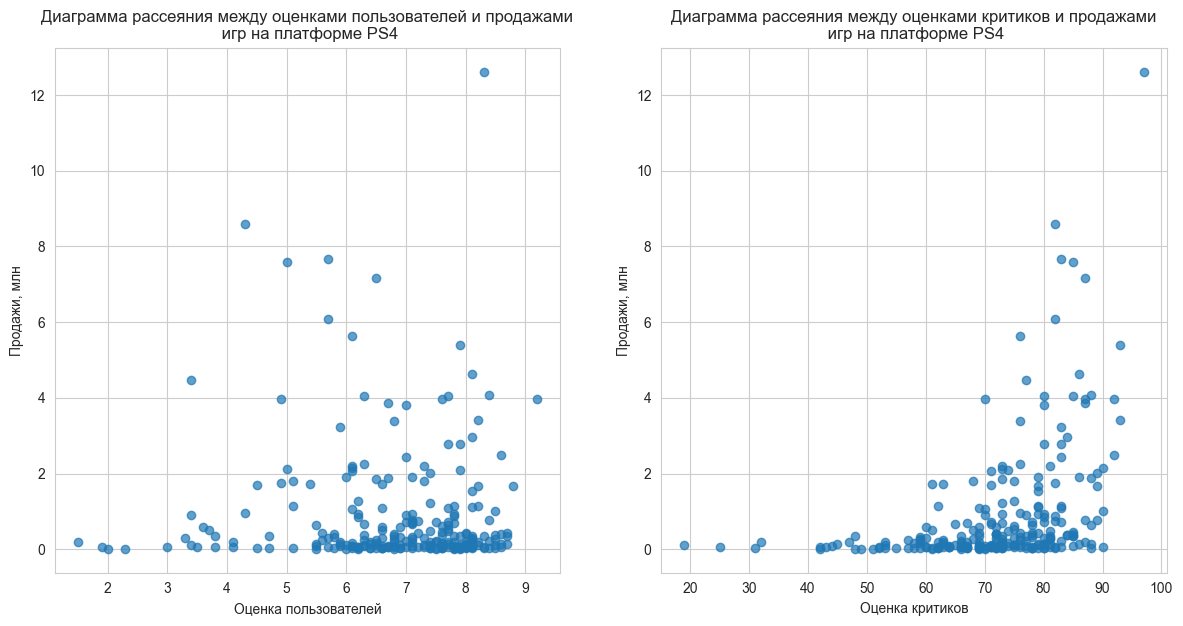

In [42]:
fig = plt.figure(figsize=(30, 15))
ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax1.grid(True)
ax2.grid(True)
ax1.set_ylabel('Продажи, млн')
ax1.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Продажи, млн')
ax2.set_xlabel('Оценка критиков')
ax1.scatter(x=ps4['user_score'], y=ps4['total_sales'], alpha=0.7)
ax2.scatter(x=ps4['critic_score'], y=ps4['total_sales'], alpha=0.7)
ax1.set_title('Диаграмма рассеяния между оценками пользователей и продажами\n игр на платформе PS4')
ax2.set_title('Диаграмма рассеяния между оценками критиков и продажами\n игр на платформе PS4');

Глядя на графики, можно отметить, что у обеих платформ похожее распределение оценок.
График с оценками пользователей более рассеян, чем график с оценками критиков.

Видим закономерность, до определенных баллов (до 4 - в пользовательский и до 50 в оценках критиков) что если оценка меньше указанных баллов - продаж мало. Посмотрим на коэффициенты корреляции.

In [43]:
xone.loc[:, ['total_sales', 'user_score', 'critic_score']].corr().round(2)

,total_sales,user_score,critic_score
total_sales,1.00,-0.07,0.43
user_score,-0.07,1.00,0.44
critic_score,0.43,0.44,1.00


In [44]:
ps4.loc[:, ['total_sales', 'user_score', 'critic_score']].corr().round(2)

,total_sales,user_score,critic_score
total_sales,1.00,-0.04,0.40
user_score,-0.04,1.00,0.55
critic_score,0.40,0.55,1.00


Видно, что связь между оценками критиков и продажами есть, но слабая. На продажи игры влияет много факторов (например реклама, популярность разработчиков игр, популярность платформы, цена, тех. характеристики и тд).

Отcутствие связи между пользовательскими оценками и продажами может быть обусловлена индивидуальностью и игровыми вкусами игроков, а так же субъективностью параметров их оценивания. Однако, если бы связь была бы сильнее, этому тоже можно было найти объяснение. Имеем что имеем. Оценки игроков не сильно коррелируют с продажами.

*Соотнесите выводы с продажами игр на других платформах.*

In [45]:
for i in actual_df['platform'].unique():
    if i not in ['PS4', 'XOne']:
        print(f'Матрица корреляции для {i}')
        display(actual_df[actual_df['platform'] == i]\
                .loc[:, ['total_sales', 'user_score', 'critic_score']].corr().round(2))

Матрица корреляции для 3DS


,total_sales,user_score,critic_score
total_sales,1.00,0.22,0.31
user_score,0.22,1.00,0.86
critic_score,0.31,0.86,1.00


Матрица корреляции для WiiU


,total_sales,user_score,critic_score
total_sales,1.00,0.41,0.37
user_score,0.41,1.00,0.76
critic_score,0.37,0.76,1.00


Матрица корреляции для PS3


,total_sales,user_score,critic_score
total_sales,1.00,-0.17,0.45
user_score,-0.17,1.00,0.69
critic_score,0.45,0.69,1.00


Матрица корреляции для X360


,total_sales,user_score,critic_score
total_sales,1.00,-0.14,0.53
user_score,-0.14,1.00,0.63
critic_score,0.53,0.63,1.00


Матрица корреляции для PC


,total_sales,user_score,critic_score
total_sales,1.00,-0.07,0.17
user_score,-0.07,1.00,0.47
critic_score,0.17,0.47,1.00


Матрица корреляции для Wii


,total_sales,user_score,critic_score
total_sales,1.0,1.0,NaN
user_score,1.0,1.0,NaN
critic_score,NaN,NaN,NaN


Матрица корреляции для PSV


,total_sales,user_score,critic_score
total_sales,1.00,-0.17,0.04
user_score,-0.17,1.00,0.52
critic_score,0.04,0.52,1.00


Матрица корреляции для PSP


,total_sales,user_score,critic_score
total_sales,1.0,NaN,NaN
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN


Посмотрев на остальные платформы, мы видим, что по всем платформам нет связи между оценками пользователей и кол-вом продаж и небольшая взаимосвязь оценок критиков и кол-вом продаж.

Наибольшая корреляция оценок критиков к объемам продажам современных консолей, внимание к консолям предыдущего поколения снижено.

*Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

Отобразим график распределения продаж в разбивке по жанрам в двух масштабах с выбросами и без.


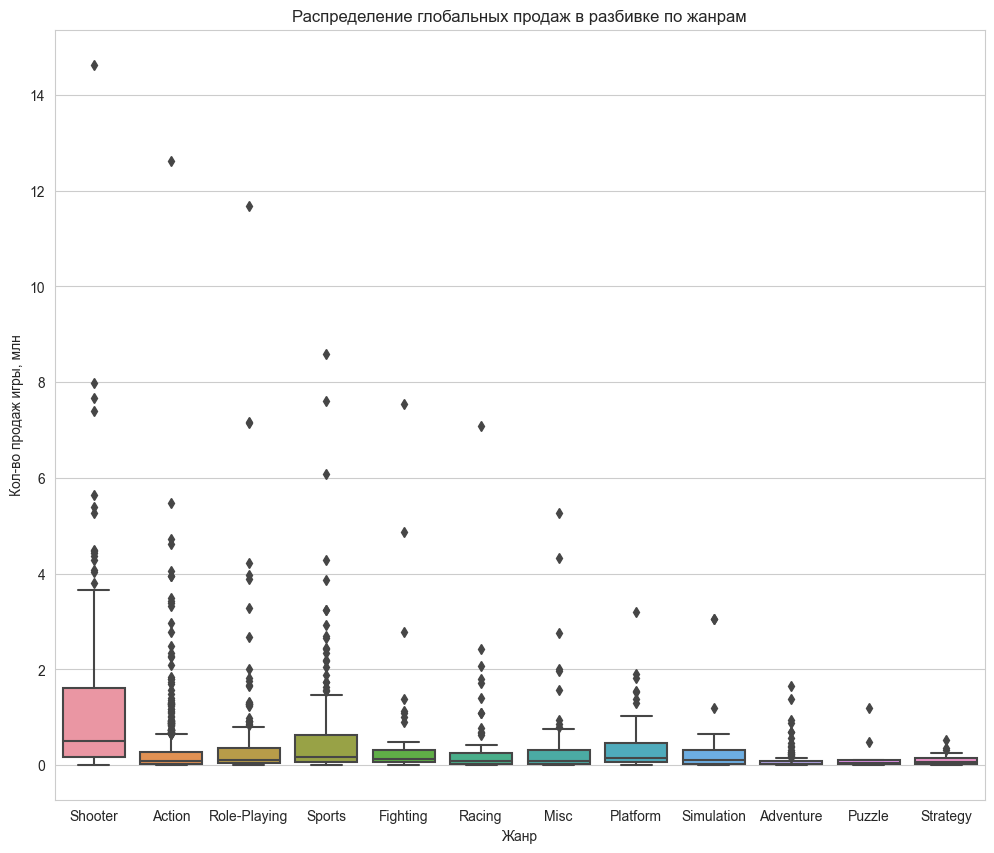

In [46]:
fig = plt.figure(figsize=(12, 10))
sns.boxplot(x=actual_df['genre'], y=actual_df['total_sales']);
plt.title('Распределение глобальных продаж в разбивке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Кол-во продаж игры, млн')
plt.show()

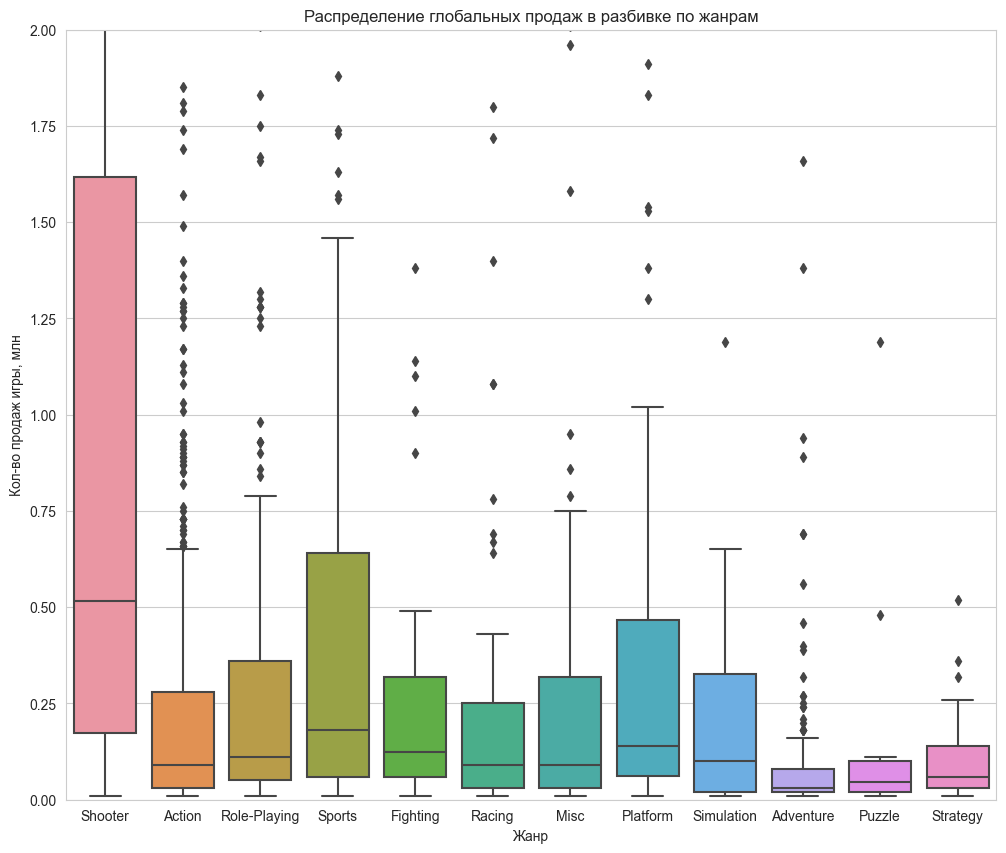

In [47]:
fig = plt.figure(figsize=(12, 10))
sns.boxplot(x=actual_df['genre'], y=actual_df['total_sales']);
plt.title('Распределение глобальных продаж в разбивке по жанрам')
plt.ylim(0,2)
plt.xlabel('Жанр')
plt.ylabel('Кол-во продаж игры, млн')
plt.show()

In [48]:
for i in sorted(actual_df['genre'].unique()):
    median_sales = actual_df[actual_df['genre'] == i]['total_sales'].median().round(2)
    print(f"Медианная продажа игр в жанре {i} = {median_sales} млн. копий")

Медианная продажа игр в жанре Action = 0.09 млн. копий
Медианная продажа игр в жанре Adventure = 0.03 млн. копий
Медианная продажа игр в жанре Fighting = 0.12 млн. копий
Медианная продажа игр в жанре Misc = 0.09 млн. копий
Медианная продажа игр в жанре Platform = 0.14 млн. копий
Медианная продажа игр в жанре Puzzle = 0.04 млн. копий
Медианная продажа игр в жанре Racing = 0.09 млн. копий
Медианная продажа игр в жанре Role-Playing = 0.11 млн. копий
Медианная продажа игр в жанре Shooter = 0.52 млн. копий
Медианная продажа игр в жанре Simulation = 0.1 млн. копий
Медианная продажа игр в жанре Sports = 0.18 млн. копий
Медианная продажа игр в жанре Strategy = 0.06 млн. копий


In [49]:
count_of_sales = actual_df.groupby('genre').agg({'name':'count'}).sort_values(by='name', ascending=False)
count_of_sales

,name
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Наиболее прибыльными жанрами является жанр Shooter и Action. Так как медианное кол-во продаж одной Shooter игры = 0.45 млн. копий, а 75% всех игр продавалась в кол-ве до 1.4 мон копий. С Action ситуация немного иная - медианнаое кол-во копий 1 игры маленькое = 0.11 млн. копий, но больгинство игр жанра Action, А так же часто есть выбросы - мегапопулярные игры, кол-во копий которых доходит до 20млн за 1 игру.

На втором месте я бы поставила жанр Sports и Platform, медианное кол-во продаж 1 игры = 0.22 и 0.24 млн. копий, 75% всех игр продавалась в кол-ве до 0.75 мл копий. 

Наименее прибыльными жанрами как по кол-ву игр, так и по кол-ву продаж являются Puzzle и Adventure. Puzzle всего имеют 17 игр за несколько лет. А Adventure, хоть и имеет около 250 игр, но средняя продаваемость около 0.03 млн. копий.

Оставшиеся игры имеют медианную продаваемость игр 0.1 млн копий.

#### Шаг 4. Составьте портрет пользователя каждого региона

*Определите для пользователя каждого региона (NA, EU, JP):  
        -Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
        -Самые популярные жанры (топ-5). Поясните разницу.  
        -Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

Создадим отдельные датафреймы для каждого региона.

In [50]:
na = actual_df.loc[actual_df['na_sales'] > 0].reset_index(drop=True)
eu = actual_df.loc[actual_df['eu_sales'] > 0].reset_index(drop=True)
jp = actual_df.loc[actual_df['jp_sales'] > 0].reset_index(drop=True)

Для игр на платформах, не входящих в топ-5 изменим наименование платформы на 'other'

In [51]:
na_top_5_platforms = na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).index
na.loc[~na['platform'].isin(na_top_5_platforms), 'platform'] = 'other'
na.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
721,Adventure Time: Finn & Jake Investigations,PS4,2015.0,Action,0.03,0.05,0.00,0.02,NaN,NaN,no rating,0.10
217,The Elder Scrolls V: Skyrim,XOne,2016.0,Role-Playing,0.41,0.27,0.00,0.07,NaN,NaN,no rating,0.75
151,Sunset Overdrive,XOne,2014.0,Shooter,0.63,0.40,0.00,0.10,81.0,7.7,M,1.13
344,Skylanders: Trap Team,PS4,2014.0,Action,0.19,0.18,0.00,0.07,78.0,5.6,E10+,0.44
622,Metal Gear Solid V: Ground Zeroes,X360,2014.0,Action,0.07,0.05,0.01,0.01,NaN,5.7,M,0.14


In [52]:
eu_top_5_platforms = eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).index
eu.loc[~eu['platform'].isin(eu_top_5_platforms), 'platform'] = 'other'
eu.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
809,BlazBlue: Chrono Phantasma Extend,XOne,2015.0,Action,0.05,0.01,0.00,0.01,NaN,6.3,T,0.07
999,Pillars of Eternity,PC,2014.0,Role-Playing,0.00,0.02,0.00,0.00,89.0,8.3,M,0.02
399,Sword Art Online: Lost Song,other,2015.0,Role-Playing,0.06,0.04,0.23,0.03,70.0,7.1,T,0.36
767,Transformers: Devastation,PS3,2015.0,Action,0.03,0.04,0.00,0.01,NaN,7.1,T,0.08
388,Farming Simulator 2015,PS3,2015.0,Simulation,0.11,0.20,0.00,0.06,NaN,NaN,no rating,0.37


In [53]:
jp_top_5_platforms = jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).index
jp.loc[~jp['platform'].isin(jp_top_5_platforms), 'platform'] = 'other'
jp.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Metal Gear Solid V: Ground Zeroes,PS4,2014.0,Action,0.45,0.47,0.17,0.18,75.0,6.2,M,1.27
76,Until Dawn,PS4,2015.0,Adventure,0.45,0.90,0.05,0.26,79.0,8.2,M,1.66
484,IA/VT Colorful,PSV,2015.0,Misc,0.00,0.00,0.07,0.00,NaN,NaN,no rating,0.07
427,Natural Doctrine,PS4,2014.0,Role-Playing,0.05,0.02,0.02,0.01,53.0,6.0,M,0.10
230,World of Final Fantasy,PS4,2016.0,Role-Playing,0.08,0.14,0.08,0.04,77.0,8.3,E10+,0.34


Отобразим график распределения продаж по регионам по топ-5 платформам.

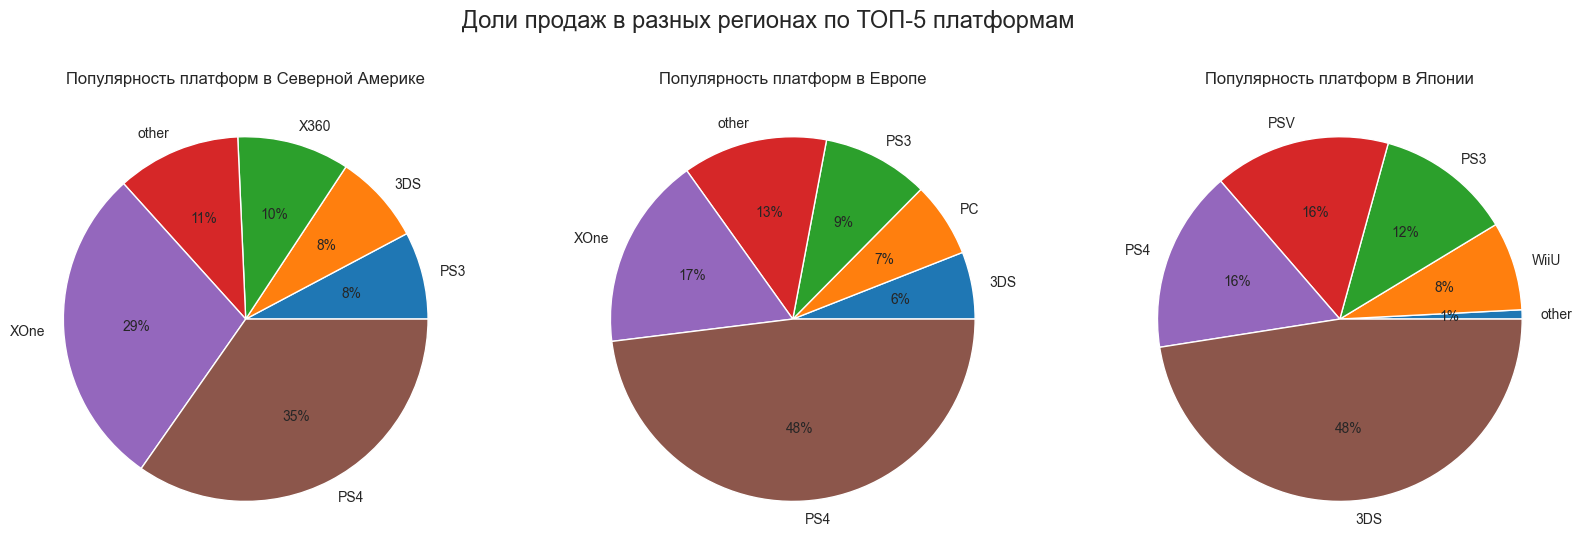

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))


na.groupby('platform')['na_sales'].sum().sort_values().plot(kind='pie',
        y=na.groupby('platform')['na_sales'].sum().sort_values().name,
        title='Популярность платформ в Северной Америке',
        autopct='%1.0f%%',
        ax=ax[0]
                                                           ).set(ylabel='')

eu.groupby('platform')['eu_sales'].sum().sort_values().plot(kind='pie',
        y=eu.groupby('platform')['eu_sales'].sum().sort_values().name,
        title='Популярность платформ в Европе',
        autopct='%1.0f%%',
        ax=ax[1]
                                                           ).set(ylabel='')

jp.groupby('platform')['jp_sales'].sum().sort_values().plot(kind='pie',
        y=jp.groupby('platform')['jp_sales'].sum().sort_values().name,
        title='Популярность платформ в Японии',
        autopct='%1.0f%%',
        ax=ax[2]
                                                           ).set(ylabel='');
fig.suptitle('Доли продаж в разных регионах по ТОП-5 платформам', horizontalalignment='center', x=0.5, y=0.65, fontsize=17);

Среди пользователей из Северной Америки наиболее популярными платформами являюься XOne и PS4, а так же есть интерес к предыдущим поколениям этих платформ - X360 и PS3, 5-ой платформой по популярности является карманная консоль 3DS.

В Европе скорее (около 50% всех игроков) выбирают PS4 и PS3, а к Xone и X360 интерес не такой сильный, как в Северной Америке. 5-ой платформой по популярности так же является карманная консоль 3DS.

В Японии почти половина всех игроков предпочитает портативную консоль 3DS, возможно это связано с ритмом жизни Японцев - они много времени тратят в дороге, а поиграть в дороге - хороший вариант скоротать время. 2-ой по популярности платформой является PS3, набирает популярность следующее поеоление этой консоли - PS4. Интересно, что в японии сниженный интерес к консолям XOne и X360, возможно, потому что в Японии продвигают свои собственные продукты и консоли (Nintendo и Sony - японские компании) либо самим японцам ближе свое.

*Самые популярные жанры (топ-5). Поясните разницу.*

Для игр жанров, не входящих в топ-5 изменим наименование жанра на 'other'

In [55]:
na_top_5_genres = na.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).index
na.loc[~na['genre'].isin(na_top_5_genres), 'genre'] = 'other'
na.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
847,Bladestorm: Nightmare,XOne,2015.0,Action,0.03,0.02,0.00,0.00,48.0,7.1,T,0.05
635,Dead Island Definitive Collection,PS4,2016.0,Action,0.03,0.07,0.01,0.02,63.0,6.4,M,0.13
33,Assassin's Creed: Unity,PS4,2014.0,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
758,Persona 4: Arena Ultimax,X360,2014.0,other,0.06,0.01,0.00,0.01,85.0,7.4,T,0.08
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68


In [56]:
eu_top_5_genres = eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).index
eu.loc[~eu['genre'].isin(eu_top_5_genres), 'genre'] = 'other'
eu.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
417,Disney Infinity 3.0,XOne,2015.0,Action,0.20,0.11,0.00,0.03,NaN,NaN,no rating,0.34
494,F1 2015,XOne,2015.0,Racing,0.08,0.15,0.00,0.02,64.0,5.3,E,0.25
806,Sherlock Holmes: Crimes & Punishments,PS3,2014.0,other,0.03,0.03,0.00,0.01,NaN,NaN,no rating,0.07
27,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
776,Pac-Man and the Ghostly Adventures 2,3DS,2014.0,other,0.03,0.04,0.00,0.01,60.0,NaN,E10+,0.08


In [57]:
jp_top_5_genres = jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).index
jp.loc[~jp['genre'].isin(jp_top_5_genres), 'genre'] = 'other'
jp.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
30,Assassin's Creed: Unity,PS4,2014.0,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
860,Hakuoki: Reimeiroku - Omouhase Kara,PSV,2015.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
563,Sword Art Online: Game Director's Edition,PS4,2015.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,no rating,0.05
397,Hyperdimension Neptunia U: Action Unleashed,PSV,2014.0,Action,0.03,0.01,0.06,0.01,71.0,6.8,T,0.11
418,Sacred 3,PS3,2014.0,Role-Playing,0.03,0.04,0.03,0.01,56.0,3.4,M,0.11


Отобразим график распределения продаж по регионам по топ-5 жанрам.

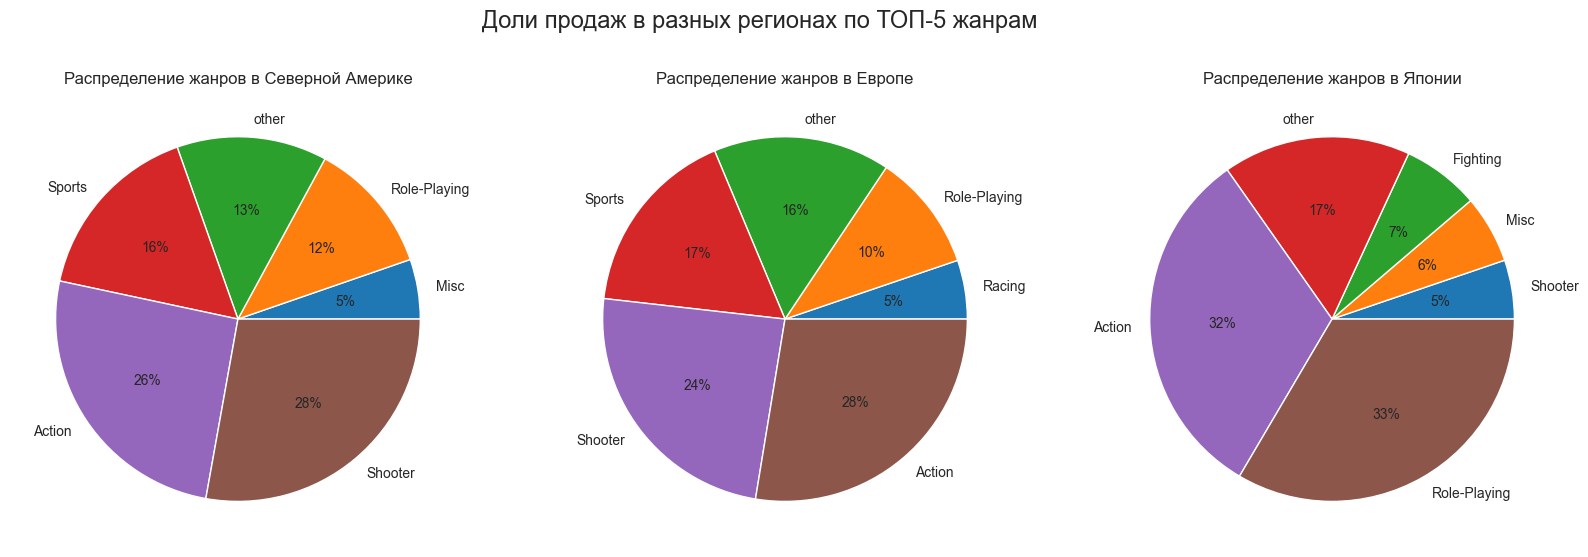

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))


na.groupby('genre')['na_sales'].sum().sort_values().plot(kind='pie',
        y=na.groupby('genre')['na_sales'].sum().sort_values().name,
        title='Распределение жанров в Северной Америке',
        autopct='%1.0f%%',
        ax=ax[0]
                                                           ).set(ylabel='')

eu.groupby('genre')['eu_sales'].sum().sort_values().plot(kind='pie',
        y=eu.groupby('genre')['eu_sales'].sum().sort_values().name,
        title='Распределение жанров в Европе',
        autopct='%1.0f%%',
        ax=ax[1]
                                                           ).set(ylabel='')

jp.groupby('genre')['jp_sales'].sum().sort_values().plot(kind='pie',
        y=jp.groupby('genre')['jp_sales'].sum().sort_values().name,
        title='Распределение жанров в Японии',
        autopct='%1.0f%%',
        ax=ax[2]
                                                           ).set(ylabel='');
fig.suptitle('Доли продаж в разных регионах по ТОП-5 жанрам', horizontalalignment='center', x=0.5, y=0.65, fontsize=17);

В Северной Америке и Европе наиболее популярны 3 жанра - Action, Shooter и Sports. В этих регионах существует долгая история развития киноиндустрии и фильмов экшн- и шутер-жанров. Влияние голливудских блокбастеров и популярных сериалов также распространяется на игровую индустрию. Игры жанра экшн и шутеры предлагают аудитории подобные впечатления.
Северная Америка и Европа часто являются центрами разработки игр и технологического развития. Это позволяет играм в жанрах экшн и шутеры использовать передовые графические технологии и механики, что привлекает игроков.

В Японии - Role-Playing, Action. Это моэет быть связано культурными особенностями -  Япония имеет богатую культурную историю, включая множество литературных и мифологических произведений (например манга, аниме), где присутствуют элементы фэнтези и ролевой игры. Игры ролевого жанра воссоздают и расширяют эти темы, что делает их привлекательными для японской аудитории.

*Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

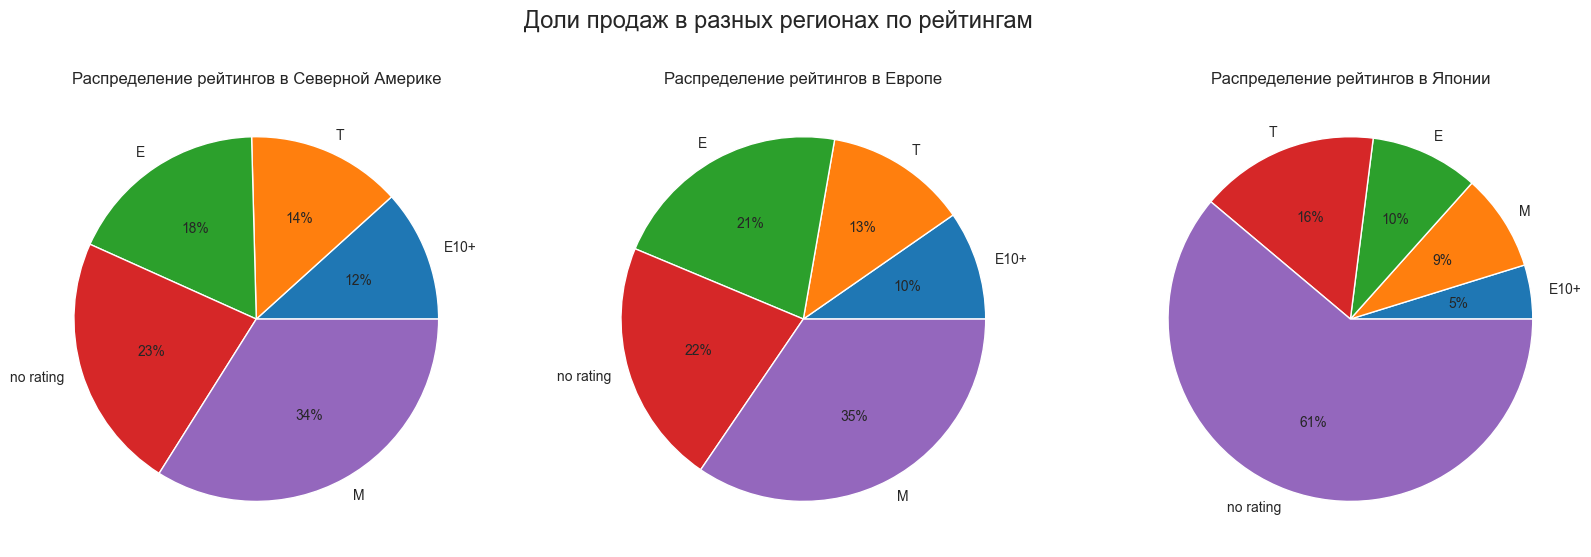

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))


na.groupby('rating')['na_sales'].sum().sort_values().plot(kind='pie',
        y=na.groupby('rating')['na_sales'].sum().sort_values().name,
        title='Распределение рейтингов в Северной Америке',
        autopct='%1.0f%%',
        ax=ax[0]
                                                           ).set(ylabel='')

eu.groupby('rating')['eu_sales'].sum().sort_values().plot(kind='pie',
        y=eu.groupby('rating')['eu_sales'].sum().sort_values().name,
        title='Распределение рейтингов в Европе',
        autopct='%1.0f%%',
        ax=ax[1]
                                                           ).set(ylabel='')

jp.groupby('rating')['jp_sales'].sum().sort_values().plot(kind='pie',
        y=jp.groupby('rating')['jp_sales'].sum().sort_values().name,
        title='Распределение рейтингов в Японии',
        autopct='%1.0f%%',
        ax=ax[2]
                                                           ).set(ylabel='');
fig.suptitle('Доли продаж в разных регионах по рейтингам', horizontalalignment='center', x=0.5, y=0.65, fontsize=17);

На графиках не отображены рейтинги ЕС(3+) и AO(18+). Таких игр очень мало. 

Также видно, что большая доля игр, для которых нет рейтинга. Возиожно, наличие таких игр связано еще с тем, что не все разработчки подают заявку на присвоение рейтинга игры в ESRB.

По графикам видно, что 20% проданных игр в Северной Америке и Европе не имеюют рейтинга. В Японии другая закономерность, там 60% игр - без рейтинга ESRB, возможно, это связано с тем, что в Японии есть своя организация CERO, занимающаяся присвоением рейтингов в Японии.

В Северной Америке и Европе - более продаваемые игры с рейтингом М (17+) и Е (для всех возрастов), менее популярны игры с рейтингом T (13+) и E10+.

В Японии дело обстоит немного иначе. - более продаваемые игры с рейтингом T (13+). В целом, это может быть связано с тем, что в Японии запрещены игры с большим кол-вом элементов насилия, которые содержатся в играх с рейтингом для взрослых.

#### Шаг 5. Проверьте гипотезы

*1. Проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC равны.
Альтернативная - Средние пользовательские рейтинги платформ не равны.

alpha выберем 5%, проверим выборки на равенство уол-ва элементов.

In [60]:
alpha = 0.05
xone_score = actual_df[(actual_df['platform'] == 'XOne') & ~(actual_df['user_score'].isna())].user_score
pc_score = actual_df[(actual_df['platform'] == 'PC') & ~(actual_df['user_score'].isna())].user_score
print(xone_score.shape[0], pc_score.shape[0])

165 122


In [61]:
xone_mean = xone_score.mean()
pc_mean = pc_score.mean()
xone_std = (np.var(xone_score)) ** 0.5
pc_std = (np.var(pc_score)) ** 0.5

results = st.ttest_ind(xone_score, pc_score)

print(f'Mean score XOne: {xone_mean}')
print(f'Mean score PC: {pc_mean}')
print(f'Standard deviation XOne: {xone_std}')
print(f'Standard deviation PC: {pc_std}')
print(f'Statistic: {results.statistic}')
print(f'P-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Mean score XOne: 6.594545454545456
Mean score PC: 6.298360655737705
Standard deviation XOne: 1.3709653553280048
Standard deviation PC: 1.6962825123577492
Statistic: 1.6285882029651313
P-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


P-value = 14%. Т.е есть вероятность случайно получить разницу между средними двух выборок такую и больше при верной нулевой гипотезе. Нет оснований отклонить нулевую гипотезу. То есть принимаем, что средние пользовательские рейтинги игр платформ Xbox One и PC равны.

*2. Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные.

In [62]:
action = actual_df[(actual_df['genre'] == 'Action') & ~(actual_df['user_score'].isna())].user_score
sports = actual_df[(actual_df['genre'] == 'Sports') & ~(actual_df['user_score'].isna())].user_score
print(action.shape[0], sports.shape[0])

297 127


Так как выборки имеют разные размеры, применим в тесте equal_var=False.

In [63]:
alpha = 0.05
action_mean = action.mean()
sports_mean = sports.mean()
action_std = (np.var(action)) ** 0.5
sports_std = (np.var(sports)) ** 0.5

results = st.ttest_ind(action, sports, equal_var=False)

print(f'Mean score Action: {action_mean}')
print(f'Mean score Sports: {sports_mean}')
print(f'Standard deviation Action: {action_std}')
print(f'Standard deviation Sports: {sports_std}')
print(f'Statistic: {results.statistic}')
print(f'P-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Mean score Action: 6.760606060606061
Mean score Sports: 5.2251968503937
Standard deviation Action: 1.3755306180435933
Standard deviation Sports: 1.8492802815352567
Statistic: 8.384614718486121
P-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-value очень маленький. Это значит, что вероятность случайно получить такое отличие очень мала и это отличие между средними статистически значимо. Есть основания для отвержения нулевой гипотезы в пользу альтернативной. Принимаем, что средние пользовательские рейтинги жанров Action и Sports разные.

Вывод

Мы провели исследование рынка компьютерных игр за весь период их существования.
Выяснили, что актуальными можно считать данные за 2014-2016 год для прогноза на 2017 год. Средний срок существования платформы - 10 лет.

В ходе работы с данными были обнаружены пропуски в рейтингах и в пользовательских оценках. Это связано с тем, что системы оценивания игр и система сбор оценок пользователей, а так же интернет появились не сразу. Так же, исторические данные есть не по всем играм. А еще часть игр не обратила на себя достаточно внимания пользователей и критиков. А касаемо рейтингов - не для всех регионов является важным использовать рейтинги ESRB.

В целом для выявления определяющие успешность игр закономерностей необходимо обращать внимание на следующие аспекты:
1. Регион аудитории игроков. В разных регионах вкусы и предпочтения игроков отличаются. В зависимости от культурных, поведенческих, игровых исторических и технологических факторов, складываются присущие разным регионам разные игровые предпочтения.
2. Популярность платформ. Стоит отметить, что игровые платформы живут не вечно. На смену старым приходят новые, более качественные и мощные поколения игровых платформ, которые вытесняют предыдущие.
3. Жанр игр. Разные жанры могут быть по-разному востребованы как на разных платформах, так в разных регионах.

На актуальный период (2014-2016 год) растущими являются платформы XOne и PS4.
В Северной Америке и Европе они набирают популярность, соответственно продажи игр на этих платформах ближайшие 2 года будут высокими.
В Европе, самой популярной является PS3 и PS4, следует сделать упор на игры на платформе PS4.
Жанры, которые следует рассмотреть для продвижения в этих регионах - это Action, Shooter и Sports, присмотреться к жанру Platforms.
В Европе и Америке предпочтительны игры с рейтингом M (17+) и E (для всех возрастов).



В Японии аудитория предпочитает старые платформы собственного происхождения (спадающие 3DS и PS3). В 2017 году, вероятно, будет увеличение интереса к PS4, так как это следующее поколение PS3, а так же следует присмотреться к карманным консолям, которые будут выпускаться позднее. Самые популярные жанры в Японии - это Role-Playing и Action. На них стоит обратить внимание.
В Японии предпочтительны игры с рейтингом T (13+). Однако большая часть продаж в Японии игр без рейтинга ESRB. К таким играм тоже стоит присмотреться.